<a href="https://colab.research.google.com/github/annaho124/Data-Mining-for-BA/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install seaborn

In [1]:
#import required functionality for this chapter
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import matplotlib

In [2]:
#import 2 examples' database
# url1 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/BostonHousing.csv'
# url2 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/Amtrak.csv'
ho = pd.read_csv("../DATA/BostonHousing.csv")
am = pd.read_csv("../DATA/Amtrak.csv")
ho.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


# Basic Charts: Bar Charts, Line Graphs and Scatter Plots

The three most effective basic plots are bar charts, line graphs, and scatter plots. These plots are easy to create in Python using pandas and are the plots most commonly used in the current business world, in both data exploration and presentation (unfortunately, pie charts are also popular, although they are usually ineffective visualizations)

In [6]:
#convert the Amtrak data to be suitable for time series analysis
am['Date'] = pd.to_datetime(am.Month, format = '%d/%m/%Y')
ridership_ts = pd.Series(am.Ridership.values, index = am.Date)
am

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01
...,...,...,...
154,01/11/2003,2076.054,2003-11-01
155,01/12/2003,2140.677,2003-12-01
156,01/01/2004,1831.508,2004-01-01
157,01/02/2004,1838.006,2004-02-01


In [7]:
#Boston Housing Data
ho = ho.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
ho

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


## Pandas version

Text(0, 0.5, 'Ridership (in 000s)')

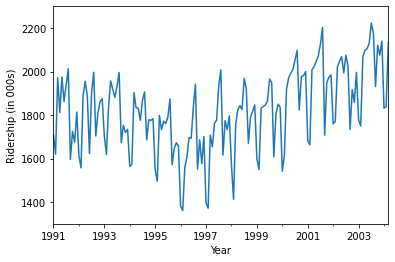

In [8]:
##line graph
ridership_ts.plot(ylim=[1300,2300], legend = False)
plt.xlabel('Year') #set x-axis label
plt.ylabel('Ridership (in 000s)') #set y-axis label

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

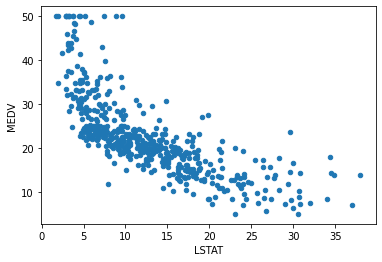

In [9]:
#scatter plot with axes names
ho.plot.scatter(x ='LSTAT', y = 'MEDV', legend = False)

Text(0, 0.5, 'Avg. MEDV')

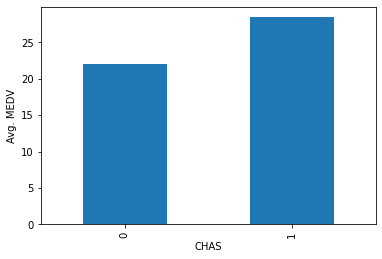

In [10]:
#barchart of CHAS vs. mean MEDV
#compute mean MEDV per CHAS = (0,1)
ax = ho.groupby('CHAS').mean().MEDV.plot(kind = 'bar')
ax.set_ylabel('Avg. MEDV')

Text(0, 0.5, '% of CAT.MEDV')

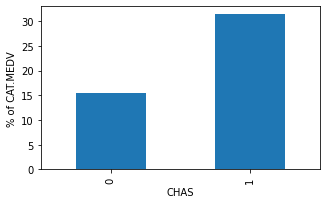

In [11]:
#barchart of CHAS vs CAT_MEDV
dataForPlot = ho.groupby('CHAS').mean()['CAT_MEDV']*100
ax = dataForPlot.plot(kind = 'bar', figsize = [5, 3])
ax.set_ylabel('% of CAT.MEDV')

## Matplotlib version

Text(0, 0.5, 'Ridership (in 000s)')

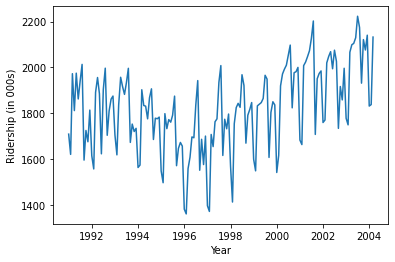

In [12]:
#line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year') #set x-axis label
plt.ylabel('Ridership (in 000s)') #set y-axis label

Text(0, 0.5, 'MEDV')

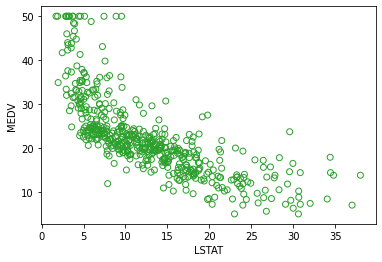

In [13]:
#set the color of the points in the scatterplot and draw as open circles
plt.scatter(ho.LSTAT, ho.MEDV, color = 'C2', facecolor = 'none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'Avg. MEDV')

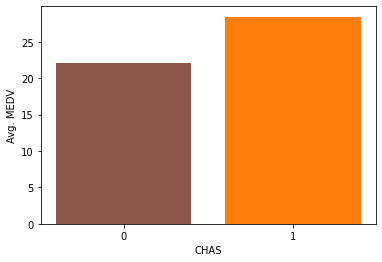

In [21]:
#barchart of CHAS vs mean MEDV
#compute mean MEDV per CHAS = (0,1)
dataForPlot = ho.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color = ['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

Text(0, 0.5, '% of CAT.MEDV')

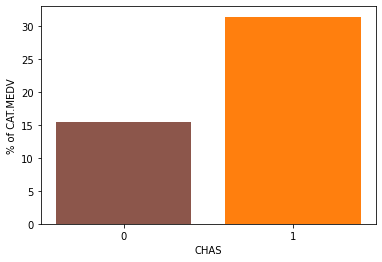

In [22]:
#barchart of CHAS vs CAT.MEDV
dataForPlot = ho.groupby('CHAS').mean()['CAT_MEDV']*100
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color = ['C5', 'C1'])
ax.set_xticks([0,1])
ax.set_xlabel('CHAS')
ax.set_ylabel('% of CAT.MEDV')

## Boxplots and Histograms

Text(0, 0.5, 'count')

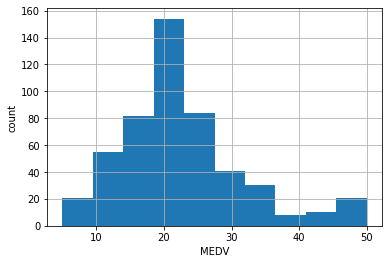

In [23]:
#Histogram of MEDV
ax = ho.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

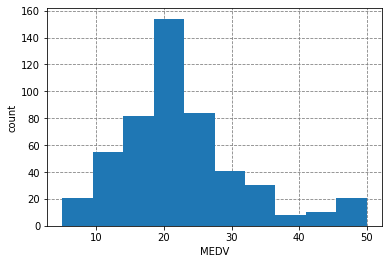

In [24]:
#alternative plot with matplotlib
fig, ax = plt.subplots()
ax.hist(ho.MEDV)
ax.set_axisbelow(True) #show the grid lines behind the histogram
ax.grid(which='major', color = 'grey', linestyle = '--')
ax.set_xlabel('MEDV')
ax.set_ylabel('count')
plt.show()

Text(0.5, 1.0, '')

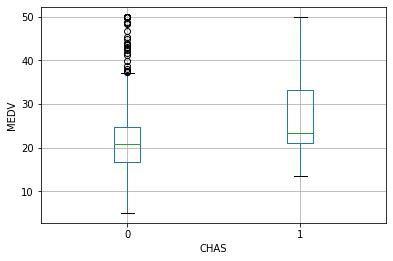

In [25]:
#boxplot of MEDV for different values of CHAS
ax = ho.boxplot(column = 'MEDV', by = 'CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('') #suppress the titles
plt.title('')

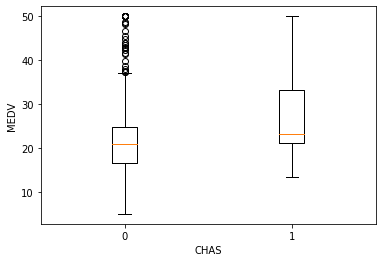

In [27]:
#alternative plot with matplotlib
dataForPlot = [list(ho[ho.CHAS==0].MEDV),
              list(ho[ho.CHAS==1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1,2])
ax.set_xticklabels([0,1])
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')
plt.show()

## Side-by-side boxplots

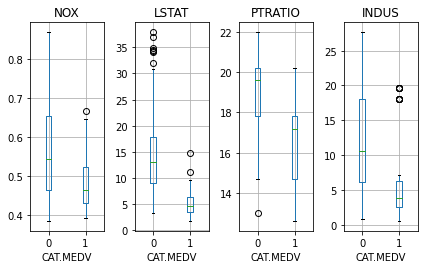

In [28]:
#side-to-side boxplots
fig, axes = plt.subplots(nrows= 1, ncols= 4)
ho.boxplot(column= 'NOX', by = 'CAT_MEDV', ax = axes[0])
ho.boxplot(column= 'LSTAT', by = 'CAT_MEDV', ax = axes[1])
ho.boxplot(column= 'PTRATIO', by = 'CAT_MEDV', ax = axes[2])
ho.boxplot(column= 'INDUS', by = 'CAT_MEDV', ax = axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('') #Supress the overall title
plt.tight_layout() #Increase the separation between the plots

## Heatmaps: Visualizing Correlations and Missing Values

<AxesSubplot:>

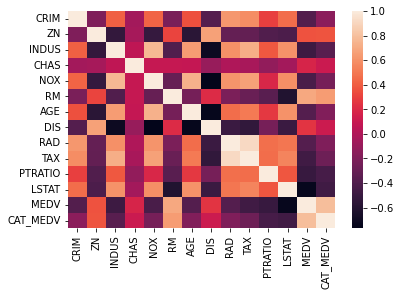

In [29]:
#Heatmap of Correlation table

#simple heatmap of correlation (without values)
corr = ho.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels= corr.columns)

<AxesSubplot:>

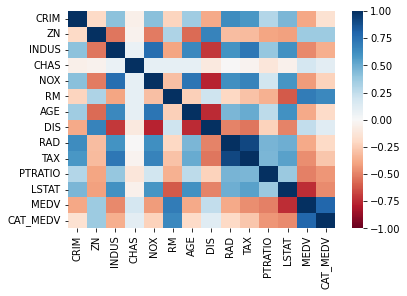

In [30]:
#change the colormap to a divergent and fix the range of colormap
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, vmin=-1, vmax = 1, cmap = 'RdBu')

<AxesSubplot:>

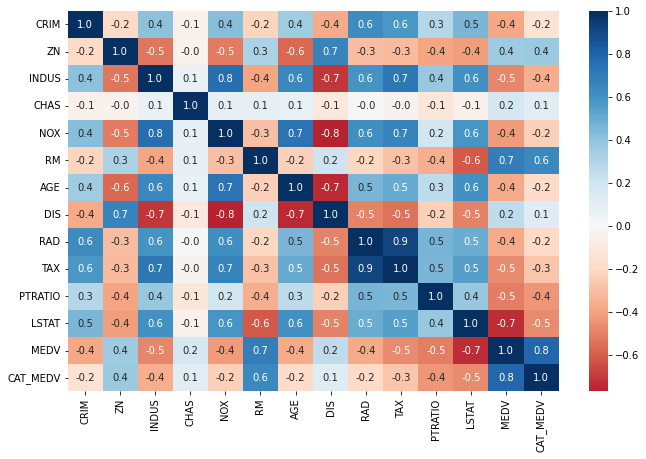

In [31]:
#include information about values (example demonstrate how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = "RdBu", center = 0, ax = ax)

In [32]:
#Heatmap of missing values

# url3 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/NYPD_Motor_Vehicle_Collisions_1000.csv'
ny = pd.read_csv('../DATA/NYPD_Motor_Vehicle_Collisions_1000.csv')
ny.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/15/2016,0:30,MANHATTAN,10003.0,40.735270,-73.982346,"(40.73527, -73.982346)",NaN,NaN,300 EAST 19 STREET,...,Unspecified,NaN,NaN,NaN,3406829,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,06/25/2013,13:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2879485,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
2,09/15/2012,23:10,QUEENS,11418.0,40.695822,-73.821102,"(40.6958225, -73.8211022)",ATLANTIC AVENUE,127 STREET,NaN,...,Unspecified,NaN,NaN,NaN,204319,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,03/14/2018,10:00,NaN,NaN,40.699017,-73.806960,"(40.699017, -73.80696)",SUTPHIN BOULEVARD,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3862996,PASSENGER VEHICLE,BU,NaN,NaN,NaN
4,06/06/2018,19:45,BRONX,10454.0,40.807770,-73.910230,"(40.80777, -73.91023)",CONCORD AVENUE,EAST 142 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3915520,Carry All,Sedan,NaN,NaN,NaN


In [33]:
#given a dataframe df create a copy of the array that is 0 idd a field contains a value and 1 for NaN
naInfo = np.zeros(ny.shape)
naInfo [ny.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns = ny.columns)
naInfo

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
996,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


[]

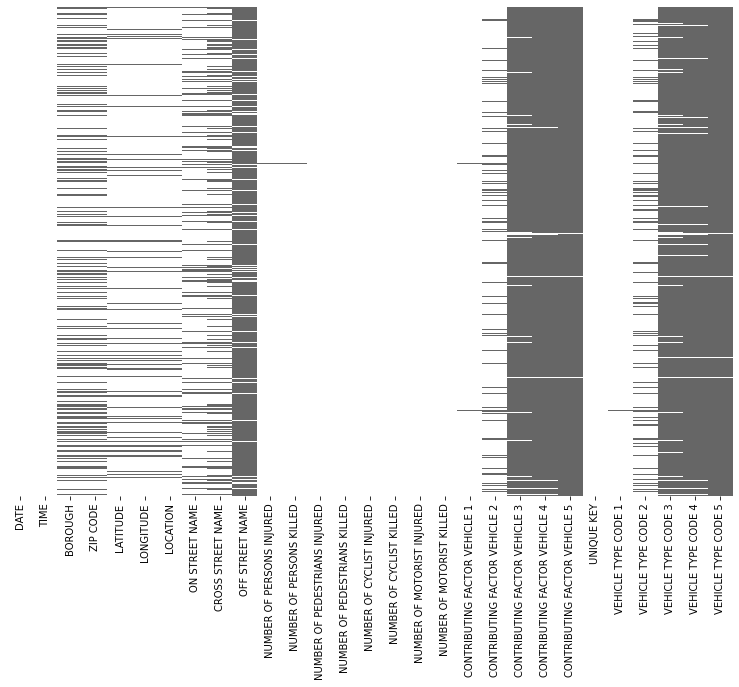

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin = 0, vmax = 1, cmap = ["white", "#666666"], cbar = False, ax =ax)
ax.set_yticks([])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'DATE'),
  Text(1.5, 0, 'TIME'),
  Text(2.5, 0, 'BOROUGH'),
  Text(3.5, 0, 'ZIP CODE'),
  Text(4.5, 0, 'LATITUDE'),
  Text(5.5, 0, 'LONGITUDE'),
  Text(6.5, 0, 'LOCATION'),
  Text(7.5, 0, 'ON STREET NAME'),
  Text(8.5, 0, 'CROSS STREET NAME'),
  Text(9.5, 0, 'OFF STREET NAME'),
  Text(10.5, 0, 'NUMBER OF PERSONS INJURED'),
  Text(11.5, 0, 'NUMBER OF PERSONS KILLED'),
  Text(12.5, 0, 'NUMBER OF PEDESTRIANS INJURED'),
  Text(13.5, 0, 'NUMBER OF PEDESTRIANS KILLED'),
  Text(14.5, 0, 'NUMBER OF CYCLIST INJURED'),
  Text(15.5, 0, 'NUMBER OF CYCLIST KILLED'),
  Text(16.5, 0, 'NUMBER OF MOTORIST INJURED'),
  Text(17.5, 0, 'NUMBER OF MOTORIST KILLED'),
  Text(18.5, 0, 'CONTRIBUTING FACTOR VEHICLE 1'),
  Text(19.5, 0, 'CONTRIBUTING FACTOR VEHICLE 2'),
  Text(20.5, 0, 'CONTRIBUTING FA

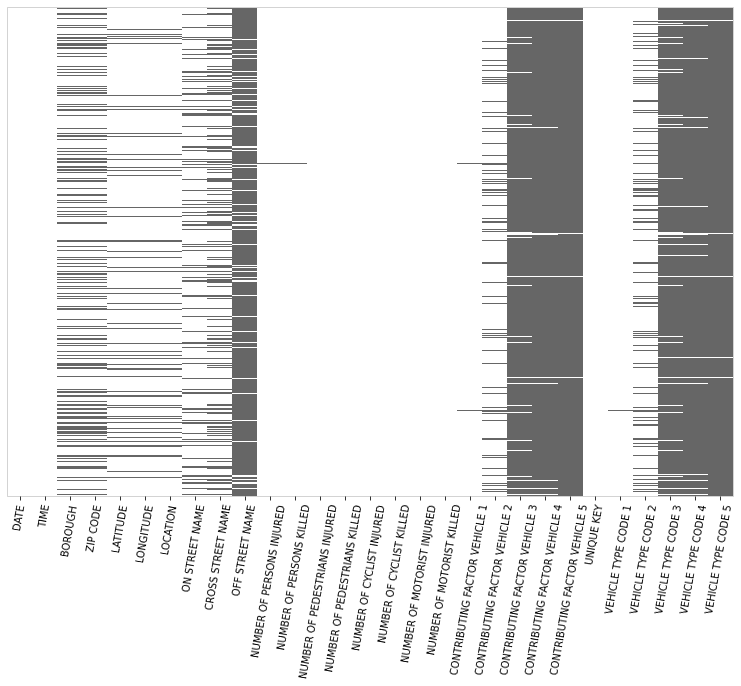

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin = 0, vmax = 1, cmap = ["white", "#666666"], cbar = False, ax =ax)
ax.set_yticks([])
#draw frame around figure
rect = plt.Rectangle((0,0), naInfo.shape[1], naInfo.shape[0], linewidth=1, edgecolor = 'lightgrey', facecolor = 'none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)

# Multidimensional Visualization

## Adding categorical variables by color-coding and multiple panels

<AxesSubplot:xlabel='LSTAT', ylabel='NOX'>

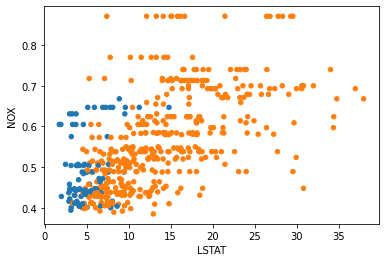

In [36]:
#Color the points by the value of CAT.MEDV
ho.plot.scatter(x = 'LSTAT', y = 'NOX', c = ['C0' if c == 1 else 'C1' for c in ho.CAT_MEDV])

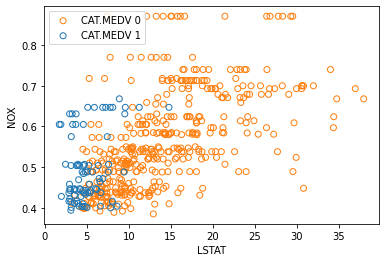

In [37]:
#Plot first the data points for CAT.MEDV of 0 and then of 1
#Setting the color to 'none' gives open circles
_, ax = plt.subplots()
for catValue, color in (0, 'C1'), (1, 'C0'):
  subset_df = ho[ho.CAT_MEDV == catValue]
  ax.scatter(subset_df.LSTAT, subset_df.NOX, color = 'none', edgecolors=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])
plt.show()

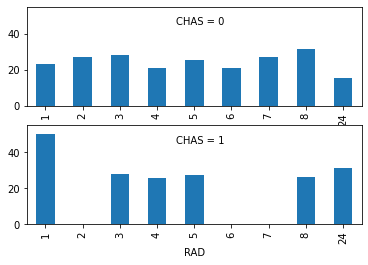

In [38]:
#panel plots
#compute mean MEDV per RAD and CHAS
dataForPlot = ho.groupby(['CHAS', 'RAD']).mean()['MEDV']
#We determine all possible RAD values to use as ticks
ticks = set(ho.RAD)
for i in range(2):
  for t in ticks.difference(dataForPlot[i].index):
    dataForPlot.loc[(i, t)] = 0
#reorder to rows, so that the index is sorted
dataForPlot = dataForPlot[sorted(dataForPlot.index)]

#detemine a common range for the y-axis
yRange = [0, max(dataForPlot)*1.1]

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot[0].plot.bar(x='RAD', ax = axes[0], ylim=yRange)
dataForPlot[1].plot.bar(x='RAD', ax = axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy = (3.5, 45))
axes[1].annotate('CHAS = 1', xy = (3.5, 45))
plt.show()

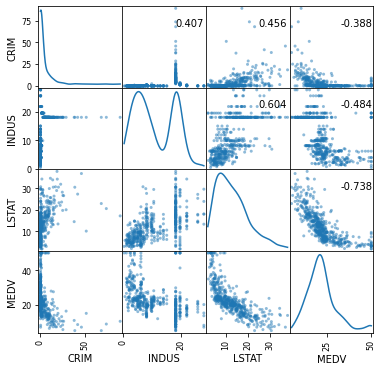

In [39]:
#Scatter plot matrix - Display scatterplots between the different values
#The diagonal shows the distribution for each values
df = ho[['CRIM','INDUS','LSTAT','MEDV']]
axes = scatter_matrix(df, alpha= 0.5, figsize= (6,6), diagonal='kde')
corr = df.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k = 1)):
  axes[i, j].annotate('%.3f' %corr[i,j], (0.8, 0.8), xycoords ='axes fraction', ha = 'center', va = 'center')
plt.show()

## Rescaling can enhance plots and reveal patterns

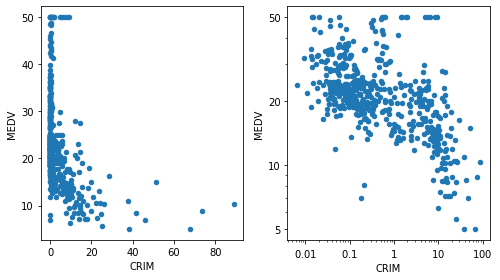

In [40]:
#Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

## scatter plot: regular and log scale
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (7,4))

#regular scale
ho.plot.scatter(x = 'CRIM', y = 'MEDV', ax = axes[0])
#log scale
ax = ho.plot.scatter(x = 'CRIM', y = 'MEDV', logx = True, logy = True, ax = axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()
plt.show()

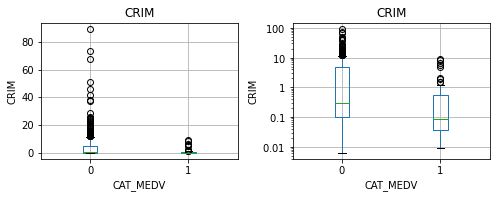

In [41]:
## boxplot: regular and log scale
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (7, 3))

#regular scale
ax = ho.boxplot(column = 'CRIM', by = 'CAT_MEDV', ax = axes[0])
ax.set_xlabel('CAT_MEDV')
ax.set_ylabel('CRIM')
#log scale
ax = ho.boxplot(column= 'CRIM', by = 'CAT_MEDV', ax = axes[1])
ax.set_xlabel('CAT_MEDV') ; ax.set_ylabel('CRIM'); ax.set_yscale('log')
#suppress the tittle
axes[0].get_figure().suptitle('')
plt.tight_layout() ; plt.show()

## Time Series Line Graph using different aggregations, adding curves and zooming in

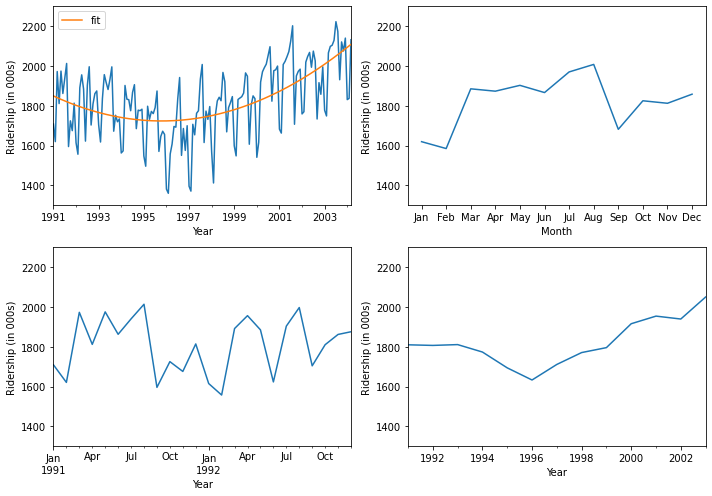

In [43]:
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize = (10, 7))

am1 = pd.read_csv('../DATA/Amtrak.csv')
am1['Month'] = pd.to_datetime(am1.Month, format = '%d/%m/%Y')
am1.set_index('Month', inplace = True)

#fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(am1)), am1.Ridership, 2))
am1_fit = pd.DataFrame({
    'fit' : [quadraticFit(t) for t in range (len(am1))]
})
am1_fit.index = am1.index

ax = am1.plot(ylim = [1300, 2300], legend = False, ax = axes[0][0])
am1_fit.plot(ax=ax)
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') #set x and y-axis label

#Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = am1.loc['1991-01-01': '1992-12-01']
ax = ridership_2yrs.plot(ylim = [1300, 2300], legend = False, ax = axes[1][0])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') #set x and y-axis label

#Average by month
byMonth = am1.groupby(by = [am1.index.month]).mean()
ax = byMonth.plot(ylim = [1300, 2300], legend = False, ax = axes[0][1])
ax.set_xlabel('Month'); ax.set_ylabel('Ridership (in 000s)') #set x and y-axis label
yticks = [-2.0, -1.75, -1/5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0]
ax.set_xticks(range(1,13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range (1, 13)])

#Average by year (exclude data from 2004)
byYear = am1.loc['1991-01-01': '2003-12-01'].groupby(pd.Grouper(freq= 'A')).mean()
ax = byYear.plot(ylim = [1300, 2300], legend = False, ax = axes[1][1])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') #set x and y-axis label

plt.tight_layout()
plt.show()

## Scatter Plot with labeled points

In [44]:
# url4 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/Utilities.csv'
ut = pd.read_csv('../DATA/Utilities.csv')
ut

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


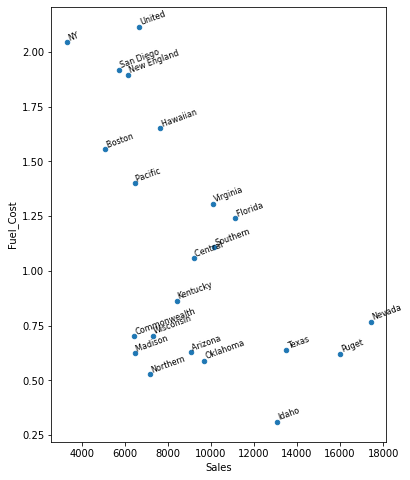

In [45]:
ax = ut.plot.scatter(x = 'Sales', y = 'Fuel_Cost', figsize = (6, 8))
points = ut[['Sales', 'Fuel_Cost', 'Company']]
_ = points.apply(lambda x: ax.text(*x, rotation = 20, horizontalalignment = 'left', verticalalignment = 'bottom', fontsize = 8), axis = 1)

## Scatter plot of large dataset with reduced marker size, jittering and more transparent coloring

In [46]:
def jitter(x, factor =1):
  """ Add random jitter to x values """
  sx = np.array(sorted(x))
  delta = sx[1:] - sx[:-1]
  minDelta = min(d for d in delta if d > 0)
  a = factor * minDelta / 5
  return x + np.random.uniform(-a, a, len(x))

In [47]:
# url5 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/UniversalBank.csv'
bank = pd.read_csv('../DATA/UniversalBank.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [48]:
saIdx = bank[bank['Securities Account'] == 1].index
saIdx

Int64Index([   0,    1,   12,   14,   19,   23,   38,   40,   47,   50,
            ...
            4882, 4891, 4892, 4893, 4894, 4912, 4917, 4956, 4959, 4971],
           dtype='int64', length=522)

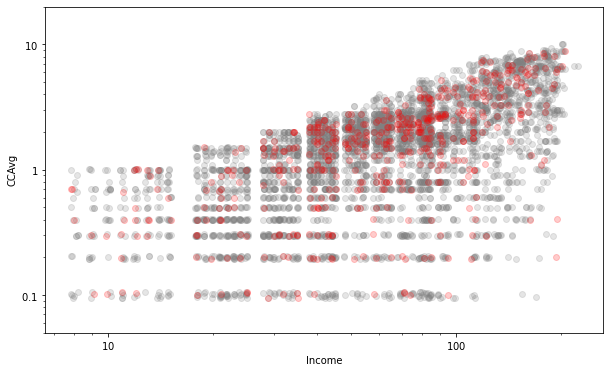

In [49]:
plt.figure(figsize= (10,6))
plt.scatter(jitter(bank.drop(saIdx).Income),
            jitter(bank.drop(saIdx).CCAvg),
            marker = 'o', color = 'grey', alpha = 0.2)
plt.scatter(jitter(bank.loc[saIdx].Income),
            jitter(bank.loc[saIdx].CCAvg),
            marker = 'o', color = 'red', alpha = 0.2)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.show()

## Parallel coordinates plot for Boston Housing data

Each of the variables (shown on the horizontal axis) is scaled to 0-100%. Panels are used to distinguish CAT.MEDV (Top panel = homes below $30000)

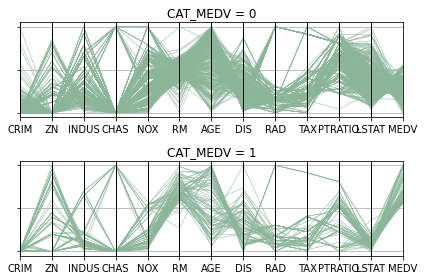

In [50]:
#Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
data = pd.DataFrame(min_max_scaler.fit_transform(ho), columns= ho.columns)

fig, axes = plt.subplots(nrows = 2, ncols = 1)
for i in (0,1):
  parallel_coordinates(data.loc[data.CAT_MEDV == i],
                       'CAT_MEDV', ax = axes[i], linewidth = 0.5)
  axes[i].set_title('CAT_MEDV = {}'. format(i))
  axes[i].set_yticklabels([])
  axes[i].legend().set_visible(False)

plt.tight_layout() #increase the separation between the plots

# Specialized Visualization

## Network plot

In [51]:
# url6 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/eBayNetwork.csv'
enet = pd.read_csv('../DATA/eBayNetwork.csv')
enet.head()

,Seller,Bidder,Weight,Bidder.Volume,Seller.Volume
0,332874919,718577508,2,3,547
1,594667804,399983466,5,6,183
2,663070601,655828811,1,4,274
3,309608641,599835541,3,8,3986
4,201729374,693022555,1,2,4681


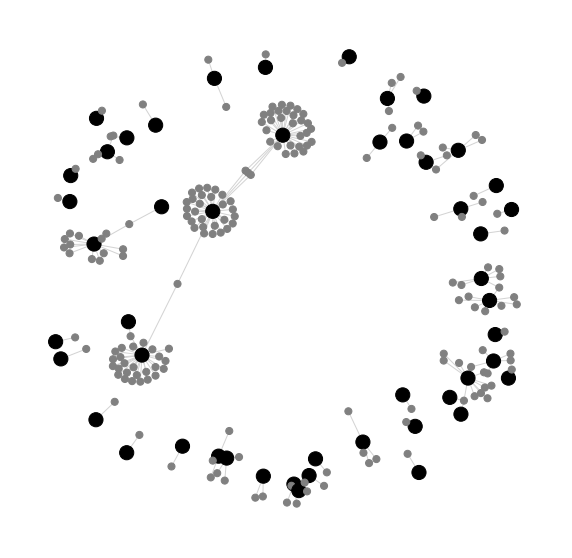

In [52]:
G = nx.from_pandas_edgelist(enet, source = 'Seller', target = 'Bidder')

isBidder = [n in set(enet.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k = 0.13, iterations = 60, scale = 0.5)
plt.figure(figsize = (10,10))
nx.draw_networkx(G, pos = pos, with_labels= False,
                 edge_color='lightgray',
                 node_color = ['gray' if bidder else 'black' for bidder in isBidder],
                 node_size = [50 if bidder else 200 for bidder in isBidder])
plt.axis('off')
plt.show()

## Treemap

In [53]:
# url7 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/EbayTreemap.csv'
tree = pd.read_csv('../DATA/EbayTreemap.csv')
tree.head()

,High Bid,Seller Feedback,Category,Sub-Category,Brand
0,26.0,23,Business & Industrial,Microscopes,Bausch_and_Laumb_Microscope
1,56.0,488,Business & Industrial,Electric Drills,Dewalt_Cordless_Drill
2,38.0,53,Business & Industrial,Electric Drills,Dewalt_Cordless_Drill
3,51.0,3,Business & Industrial,Electric Drills,Dewalt_Cordless_Drill
4,54.5,36,Sports,Golf,Titleist_Golfballs


In [54]:
# !pip install squarify
import squarify as squarify

grouped = []
for category, df in tree.groupby(['Category']):
  negativeFeedback = sum(df['Seller Feedback'] < 0) / len(df)
  grouped.append({
      'category' : category,
      'negativeFeedback' : negativeFeedback,
      'averageBid' : df['High Bid'].mean()
  })
byCategory = pd.DataFrame(grouped)
byCategory

,category,negativeFeedback,averageBid
0,Business & Industrial,0.000948,78.549005
1,Clothing & accessories,0.000736,68.247027
2,Clothing shoes & accessories,0.000000,31.349150
3,Collectibles,0.000000,35.428055
4,Computers,0.000000,53.617699
5,Consumer Electronics,0.000000,119.497480
6,Health & Beauty,0.000000,36.225592
7,Jewelry & watches,0.013245,2062.088223
8,Luggage,0.000000,37.173767
9,Pottery & Glass,0.000000,184.449959


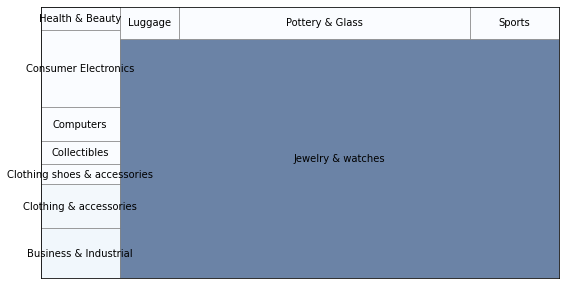

In [55]:
norm = matplotlib.colors.Normalize(vmin = byCategory.negativeFeedback.min(),
                                   vmax = byCategory.negativeFeedback.max())
colors = [matplotlib.cm.Blues(norm(value)) for value in byCategory.negativeFeedback]
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

squarify.plot(label = byCategory.category,
              sizes = byCategory.averageBid,
              color = colors,
              ax = ax,
              alpha = 0.6,
              edgecolor = 'grey')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.subplots_adjust(left = 0.1)
plt.show()

## Map chart

In [57]:
# !pip install gmaps
# !pip install ipywidgets
# !pip install widgetsnbextension
import gmaps
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html
import IPython

# url8 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/SC-US-students-GPS-data-2016.csv'
SC = pd.read_csv('../DATA/SC-US-students-GPS-data-2016.csv')
SC.head()

,latitude,longitude
0,25.6377,-80.3157
1,25.6651,-80.3032
2,25.7020,-80.2972
3,25.7319,-80.2420
4,25.7850,-80.1915


In [58]:
from IPython.display import display, HTML
from ipywidgets.embed import embed_minimal_html

In [59]:
gmaps.configure(api_key="AI...")
fig = gmaps.figure(center = (39.7, -105), zoom_level = 3)
fig.add_layer(gmaps.symbol_layer(SC, scale = 2, fill_color = 'red', stroke_color = 'red'))
fig

embed_minimal_html('map.html', views= [fig])
display(HTML(filename= 'map.html'))

## World map

In [62]:
import matplotlib
import matplotlib.pyplot as plt
# !pip install cartopy
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

In [63]:
# url9 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/gdp.csv'
gdp_df = pd.read_csv('../DATA/gdp.csv', skiprows= 4)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2015
0,Aruba,ABW,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
1,Andorra,AND,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
2,Afghanistan,AFG,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.919944e+10
3,Angola,AGO,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.026430e+11
4,Albania,ALB,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.145560e+10


In [64]:
gdp_df.rename(columns = {'2015': 'GDP2015'}, inplace = True)
gdp_df.set_index('Country Code', inplace = True) #use three letter country code to access rows
gdp_df.head()

,Country Name,Indicator Name,Indicator Code,GDP2015
Country Code,,,,
ABW,Aruba,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
AND,Andorra,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN
AFG,Afghanistan,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.919944e+10
AGO,Angola,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.026430e+11
ALB,Albania,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.145560e+10


In [65]:
#The file contains a column with two letters combinations, use na_filter to avoid converting the combination NA into not-a-number
# url10 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/Veerhoven.csv'
happiness_df = pd.read_csv('../DATA/Veerhoven.csv', na_filter= False)
happiness_df.set_index('Code', inplace = True) #use the country name to access rows
happiness_df.head()

,Serial,Nation,Score,# surveys
Code,,,,
AF,1,Afghanistan,4.1,1
AL,2,Albania,4.6,1
DZ,3,Algeria,5.7,2
AD,4,Andorra,6.8,2
AO,5,Angola,4.3,1


In [66]:
# code fix the problem 'Geometry must be a Point or LineString'. Problem is wrong version of shapely is installed
!pip uninstall shapely
!pip install shapely --no-binary shapely

^C


c:\Users\cel\miniconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


TypeError: 'Polygon' object is not iterable

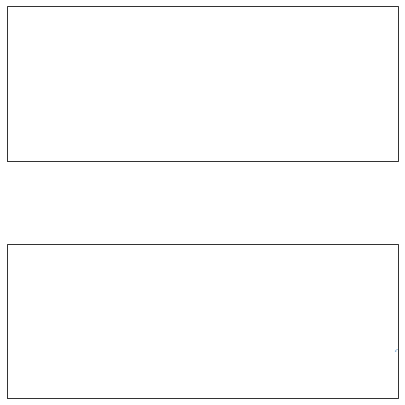

In [67]:
fig = plt.figure(figsize = (7, 8))
ax1 = plt.subplot(2, 1, 1, projection = ccrs.PlateCarree())
ax1.set_extent([-150, 60, -25, 60])
ax2 = plt.subplot(2, 1, 2, projection = ccrs.PlateCarree())
ax2.set_extent([-150, 60, -25, 60])

#create a color mapper
cmap = plt.cm.Blues_r
norm1 = matplotlib.colors.Normalize(vmin = happiness_df.Score.dropna().min(),
                                    vmax = happiness_df.Score.dropna().max())
norm2 = matplotlib.colors.LogNorm(vmin = gdp_df.GDP2015.dropna().min(),
                                  vmax = gdp_df.GDP2015.dropna().max())
shpfilename = shpreader.natural_earth(resolution= '110m', category= 'cultural',
                                      name = 'admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
  countryCode = country.attributes['ADM0_A3']
  if countryCode in gdp_df.index:
    ax2.add_geometries(country.geometry, ccrs.PlateCarree(),
                       facecolor = cmap(norm2(gdp_df.loc[countryCode].GDP2015)))
    #check various attributes to find the matching two-letter combinations
    nation = country.attributes['POSTAL']
    if nation not in happiness_df.index: nation = country.attributes['ISO_A2']
    if nation not in happiness_df.index: nation = country.attributes['WB_A2']
    if nation not in happiness_df.index and country.attributes['NAME'] == 'Norway': nation = 'NO'
    if nation in happiness_df.index:
      ax1.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor = cmap(norm1(happiness_df.loc[nation].Score)))



# PROBLEMS

## 3.1

In [68]:
# url11 = 'https://raw.githubusercontent.com/annaho124/Data-Mining-for-BA/master/ApplianceShipments.csv'
ship = pd.read_csv('../DATA/ApplianceShipments.csv')
ship.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


Text(0, 0.5, 'Shipments')

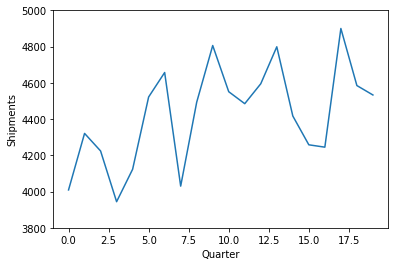

In [69]:
#Line graph
## panda version
ship.plot(ylim = [3800, 5000], legend = False)
plt.xlabel('Quarter')
plt.ylabel('Shipments')

TypeError: unhashable type: 'numpy.ndarray'

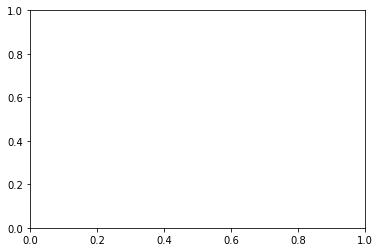

In [70]:
##matplotlib version
plt.plot(ship.index, ship)
plt.xlabel('Quarter')
plt.ylabel('Shipments')